In [1]:
import os
from ultralytics import YOLO

# ✅ 데이터셋 경로
DATA_YAML_PATH = os.path.abspath("food_data_3/data.yaml")
print("✔️ 데이터 YAML 경로:", DATA_YAML_PATH)

# ✅ 결과 저장 경로 (모델별로 다르게 지정)
RESULTS_DIR = "runs_model_compare"
os.makedirs(RESULTS_DIR, exist_ok=True)

# ✅ 학습 공통 설정
EPOCHS = 30
IMG_SIZE = 640
BATCH_SIZE = 16

✔️ 데이터 YAML 경로: c:\Users\PC\Desktop\졸작\food_data_3\data.yaml


In [2]:
def train_yolo_model(model_name, save_name):
    """
    model_name: 'yolov5s', 'yolov5m', 'yolov8s', 'yolov8m'
    save_name: 결과 저장 폴더명
    """
    print(f"\n🚀 모델 학습 시작: {model_name}")

    model = YOLO(f"{model_name}.pt")  # 사전학습 가중치

    results = model.train(
        data=DATA_YAML_PATH,
        epochs=EPOCHS,
        imgsz=IMG_SIZE,
        batch=BATCH_SIZE,
        project=RESULTS_DIR,
        name=save_name,
        save=True,
        device=0,
        verbose=True,
    )

    # ✅ 결과 저장 디렉토리
    result_path = os.path.join(RESULTS_DIR, save_name, "results.csv")
    print(f"📁 결과 CSV 저장 위치: {result_path}")
    return result_path


In [3]:
csv_paths = {}

csv_paths["yolov5s"] = train_yolo_model("yolov5s", "exp_yolov5s")
csv_paths["yolov5m"] = train_yolo_model("yolov5m", "exp_yolov5m")
csv_paths["yolov8s"] = train_yolo_model("yolov8s", "exp_yolov8s")
csv_paths["yolov8m"] = train_yolo_model("yolov8m", "exp_yolov8m")


🚀 모델 학습 시작: yolov5s
PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:02<00:00, 9.05MB/s]
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this

New https://pypi.org/project/ultralytics/8.3.169 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=c:\Users\PC\Desktop\\food_data_3\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs_model_compare, name=exp_yolov5s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_

AMP: checks passed 


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\engine\trainer.py:262: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\PC\Desktop\졸작\food_data_3\train\labels.cache... 10612 images, 9 backgrounds, 0 corrupt: 100%|██████████| 10612/10612 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 31629. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\PC\Desktop\졸작\food_data_3\valid\labels.cache... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<?, ?it/s]


Plotting labels to runs_model_compare\exp_yolov5s\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_model_compare\exp_yolov5s
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.24G      1.409       2.74      1.639         21        640: 100%|██████████| 664/664 [01:38<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.55it/s]

                   all        454       1333      0.491      0.572      0.554      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       4.3G      1.328      1.832      1.531         18        640: 100%|██████████| 664/664 [01:32<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.06it/s]


                   all        454       1333      0.633      0.592       0.64      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.06G      1.312      1.686      1.532          8        640: 100%|██████████| 664/664 [01:31<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.17it/s]


                   all        454       1333      0.595      0.585      0.608      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.08G      1.289      1.573      1.507         22        640: 100%|██████████| 664/664 [01:31<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.05it/s]

                   all        454       1333      0.644      0.638      0.676      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.25G      1.247      1.457      1.485         18        640: 100%|██████████| 664/664 [01:31<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.08it/s]

                   all        454       1333      0.676      0.657      0.719       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.11G       1.22      1.372      1.462         48        640: 100%|██████████| 664/664 [01:31<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.01it/s]

                   all        454       1333      0.733      0.671      0.734      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.08G      1.196      1.288      1.444         25        640: 100%|██████████| 664/664 [01:32<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.14it/s]

                   all        454       1333      0.695      0.725      0.754      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.12G       1.18      1.233       1.43         23        640: 100%|██████████| 664/664 [01:32<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.15it/s]

                   all        454       1333      0.715      0.674      0.728      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.29G      1.158      1.188      1.414         24        640: 100%|██████████| 664/664 [01:32<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.80it/s]

                   all        454       1333      0.763      0.723       0.78       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.22G      1.141      1.131        1.4         25        640: 100%|██████████| 664/664 [01:32<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.06it/s]

                   all        454       1333      0.751      0.751      0.803       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.28G      1.124      1.089      1.385         15        640: 100%|██████████| 664/664 [01:32<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.20it/s]

                   all        454       1333      0.765      0.702      0.787      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.13G      1.115      1.063      1.383         22        640: 100%|██████████| 664/664 [01:32<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.04it/s]

                   all        454       1333      0.758       0.74      0.791      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.26G        1.1      1.024      1.367         25        640: 100%|██████████| 664/664 [01:32<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.99it/s]

                   all        454       1333      0.795      0.703        0.8      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.08G      1.084      1.002      1.359         20        640: 100%|██████████| 664/664 [01:33<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.12it/s]

                   all        454       1333      0.794      0.744      0.812      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.05G       1.08     0.9734      1.357         20        640: 100%|██████████| 664/664 [01:33<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.93it/s]

                   all        454       1333      0.748      0.752      0.805      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.28G      1.058     0.9479      1.342         14        640: 100%|██████████| 664/664 [01:33<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.01it/s]

                   all        454       1333      0.792      0.772      0.819      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.09G      1.047     0.9145      1.329         14        640: 100%|██████████| 664/664 [01:33<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.94it/s]

                   all        454       1333      0.789       0.77      0.831      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.26G      1.042     0.8981      1.327         26        640: 100%|██████████| 664/664 [01:34<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.02it/s]

                   all        454       1333      0.822      0.759      0.826      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.12G      1.027      0.868      1.314         15        640: 100%|██████████| 664/664 [01:33<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.06it/s]

                   all        454       1333      0.827      0.748      0.832      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.22G      1.015     0.8467      1.304         23        640: 100%|██████████| 664/664 [01:32<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.07it/s]

                   all        454       1333      0.818      0.753      0.826      0.584


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.25G      1.005     0.7008       1.34         10        640: 100%|██████████| 664/664 [01:32<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.00it/s]

                   all        454       1333      0.822      0.761      0.831       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.27G     0.9777     0.6596      1.323         17        640: 100%|██████████| 664/664 [01:32<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.20it/s]


                   all        454       1333      0.798      0.758      0.822      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.27G     0.9586     0.6333      1.304          5        640: 100%|██████████| 664/664 [01:31<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.14it/s]


                   all        454       1333       0.83      0.743      0.826      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.07G     0.9395     0.6056       1.29         15        640: 100%|██████████| 664/664 [01:31<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.87it/s]

                   all        454       1333      0.799      0.768      0.825       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.11G     0.9237     0.5964      1.278         10        640: 100%|██████████| 664/664 [01:32<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.15it/s]

                   all        454       1333      0.811      0.785      0.837      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.08G     0.9108     0.5701      1.264         15        640: 100%|██████████| 664/664 [01:32<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.97it/s]

                   all        454       1333      0.816      0.781      0.835      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.08G     0.8954     0.5531      1.253         23        640: 100%|██████████| 664/664 [01:32<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.21it/s]

                   all        454       1333      0.798      0.787       0.83       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.07G     0.8851     0.5415      1.249         22        640: 100%|██████████| 664/664 [01:31<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.10it/s]

                   all        454       1333      0.823      0.776      0.831      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.08G     0.8677     0.5249      1.231         16        640: 100%|██████████| 664/664 [01:32<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.19it/s]

                   all        454       1333      0.815      0.775      0.837      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.13G     0.8537     0.5137      1.221          5        640: 100%|██████████| 664/664 [01:32<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.13it/s]

                   all        454       1333      0.818      0.785      0.839      0.602



30 epochs completed in 0.800 hours.
Optimizer stripped from runs_model_compare\exp_yolov5s\weights\last.pt, 18.5MB
Optimizer stripped from runs_model_compare\exp_yolov5s\weights\best.pt, 18.5MB

Validating runs_model_compare\exp_yolov5s\weights\best.pt...
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLOv5s summary (fused): 193 layers, 9123533 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


                   all        454       1333      0.817      0.786      0.839      0.602
                   bab        454         11      0.758          1      0.965      0.694
                baechu        454         60      0.756      0.877      0.902      0.697
          bean_sprouts        454         23      0.836      0.886      0.858      0.606
                  beef        454         36      0.846      0.763      0.795      0.621
                 bread        454         33       0.87      0.811      0.917      0.784
               cabbage        454         70      0.907      0.986      0.977      0.744
                carrot        454         89      0.812      0.775      0.869      0.575
               chicken        454         24      0.684      0.723      0.689      0.504
              cucumber        454         21      0.884      0.365      0.483      0.379
          cut_mackerel        454         20      0.763       0.75      0.884      0.618
                  dub

train: Scanning C:\Users\PC\Desktop\졸작\food_data_3\train\labels.cache... 10612 images, 9 backgrounds, 0 corrupt: 100%|██████████| 10612/10612 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 31629. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\PC\Desktop\졸작\food_data_3\valid\labels.cache... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<?, ?it/s]


Plotting labels to runs_model_compare\exp_yolov5m\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_model_compare\exp_yolov5m
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.02G      1.345      2.424      1.594         21        640: 100%|██████████| 664/664 [03:07<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]

                   all        454       1333      0.677      0.521       0.61      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.17G      1.313      1.766      1.561         18        640: 100%|██████████| 664/664 [02:53<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        454       1333      0.538      0.594      0.589       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       7.2G      1.298      1.668      1.568          8        640: 100%|██████████| 664/664 [02:49<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]

                   all        454       1333      0.595      0.622      0.619      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.12G      1.281      1.563      1.545         22        640: 100%|██████████| 664/664 [02:49<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.13it/s]

                   all        454       1333      0.664      0.582      0.653      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.13G      1.233      1.427      1.512         18        640: 100%|██████████| 664/664 [02:48<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]

                   all        454       1333      0.704      0.636      0.703      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.19G        1.2      1.339      1.489         48        640: 100%|██████████| 664/664 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]

                   all        454       1333      0.718      0.721       0.76      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       7.3G      1.176      1.247      1.471         25        640: 100%|██████████| 664/664 [02:40<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]

                   all        454       1333       0.79      0.716      0.804      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.32G       1.15       1.18      1.451         23        640: 100%|██████████| 664/664 [02:44<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.14it/s]

                   all        454       1333      0.753      0.712      0.775      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.37G      1.135      1.128      1.436         24        640: 100%|██████████| 664/664 [02:44<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]


                   all        454       1333      0.769      0.736      0.808      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.32G      1.113      1.069       1.42         25        640: 100%|██████████| 664/664 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all        454       1333      0.775      0.723      0.802      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.34G      1.093      1.023      1.398         15        640: 100%|██████████| 664/664 [02:44<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]

                   all        454       1333      0.794      0.725      0.798      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.17G      1.078     0.9994      1.401         22        640: 100%|██████████| 664/664 [02:42<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]

                   all        454       1333      0.761      0.746      0.798      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.35G       1.06     0.9638       1.38         25        640: 100%|██████████| 664/664 [02:40<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]

                   all        454       1333      0.799       0.76      0.827       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.16G      1.043     0.9282      1.366         20        640: 100%|██████████| 664/664 [02:41<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]

                   all        454       1333      0.794      0.705      0.789      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.16G      1.038     0.9009      1.363         20        640: 100%|██████████| 664/664 [02:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.21it/s]

                   all        454       1333      0.787      0.773      0.836      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.16G      1.015     0.8703      1.345         14        640: 100%|██████████| 664/664 [02:41<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]

                   all        454       1333      0.814      0.771      0.843      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.09G      1.002      0.837      1.334         14        640: 100%|██████████| 664/664 [02:41<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.67it/s]

                   all        454       1333       0.82      0.774       0.85      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.16G     0.9927     0.8122      1.331         26        640: 100%|██████████| 664/664 [02:42<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]

                   all        454       1333      0.823      0.792      0.841      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.09G     0.9754      0.783      1.316         15        640: 100%|██████████| 664/664 [02:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                   all        454       1333      0.844      0.751      0.839      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.35G     0.9595     0.7581      1.305         23        640: 100%|██████████| 664/664 [02:47<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]

                   all        454       1333      0.817      0.795      0.849      0.618


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.15G     0.9458     0.6045      1.322         10        640: 100%|██████████| 664/664 [02:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.32it/s]

                   all        454       1333      0.798      0.768      0.831      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.16G     0.9164     0.5619      1.302         17        640: 100%|██████████| 664/664 [02:41<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]

                   all        454       1333      0.821      0.796      0.845      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.16G     0.8928     0.5359      1.281          5        640: 100%|██████████| 664/664 [02:40<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]

                   all        454       1333      0.805      0.802      0.834      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.21G     0.8676     0.5093      1.263         15        640: 100%|██████████| 664/664 [02:42<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]

                   all        454       1333      0.823      0.781      0.843      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.17G     0.8528     0.4951      1.248         10        640: 100%|██████████| 664/664 [02:39<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]

                   all        454       1333       0.82      0.797      0.846      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.14G     0.8345     0.4699      1.236         15        640: 100%|██████████| 664/664 [02:42<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]

                   all        454       1333      0.862      0.791      0.857      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.13G      0.818     0.4557      1.221         23        640: 100%|██████████| 664/664 [02:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]

                   all        454       1333      0.841      0.787      0.857      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.13G     0.8013     0.4412      1.212         22        640: 100%|██████████| 664/664 [02:41<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]

                   all        454       1333      0.833      0.795      0.855      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.15G     0.7838      0.423      1.194         16        640: 100%|██████████| 664/664 [02:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        454       1333      0.843      0.806      0.862       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.17G     0.7673     0.4134      1.183          5        640: 100%|██████████| 664/664 [02:43<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]

                   all        454       1333       0.85      0.794      0.859      0.639



30 epochs completed in 1.452 hours.
Optimizer stripped from runs_model_compare\exp_yolov5m\weights\last.pt, 50.5MB
Optimizer stripped from runs_model_compare\exp_yolov5m\weights\best.pt, 50.5MB

Validating runs_model_compare\exp_yolov5m\weights\best.pt...
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
YOLOv5m summary (fused): 248 layers, 25063165 parameters, 0 gradients, 64.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]


                   all        454       1333      0.844      0.805      0.862       0.64
                   bab        454         11      0.811      0.909      0.976      0.728
                baechu        454         60      0.849      0.717        0.9      0.683
          bean_sprouts        454         23      0.856      0.826      0.892      0.684
                  beef        454         36      0.869      0.806       0.84      0.661
                 bread        454         33      0.788      0.902      0.903      0.736
               cabbage        454         70      0.962        0.9      0.968      0.794
                carrot        454         89       0.84      0.854      0.913      0.603
               chicken        454         24       0.73      0.903      0.767       0.57
              cucumber        454         21      0.883      0.361      0.507      0.431
          cut_mackerel        454         20      0.933       0.85      0.923      0.693
                  dub

100%|██████████| 21.5M/21.5M [00:02<00:00, 10.0MB/s]


New https://pypi.org/project/ultralytics/8.3.169 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=c:\Users\PC\Desktop\\food_data_3\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs_model_compare, name=exp_yolov8s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning C:\Users\PC\Desktop\졸작\food_data_3\train\labels.cache... 10612 images, 9 backgrounds, 0 corrupt: 100%|██████████| 10612/10612 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 31629. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\PC\Desktop\졸작\food_data_3\valid\labels.cache... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<?, ?it/s]


Plotting labels to runs_model_compare\exp_yolov8s\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_model_compare\exp_yolov8s
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.19G      1.394      2.826      1.614         21        640: 100%|██████████| 664/664 [01:34<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.88it/s]

                   all        454       1333      0.551      0.576      0.583      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.04G       1.31       1.73      1.515         18        640: 100%|██████████| 664/664 [01:30<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.07it/s]

                   all        454       1333       0.54      0.632      0.603      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.96G      1.283      1.593      1.517          8        640: 100%|██████████| 664/664 [01:30<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.12it/s]

                   all        454       1333      0.634      0.609      0.628      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.16G      1.253      1.487      1.491         22        640: 100%|██████████| 664/664 [01:30<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.15it/s]

                   all        454       1333      0.692       0.64      0.701      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.87G      1.211      1.369       1.47         18        640: 100%|██████████| 664/664 [01:30<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.11it/s]

                   all        454       1333      0.724      0.656      0.738      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.06G      1.186      1.286      1.449         48        640: 100%|██████████| 664/664 [01:29<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.17it/s]

                   all        454       1333      0.734      0.668      0.738      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.98G       1.16      1.201      1.432         25        640: 100%|██████████| 664/664 [01:29<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.19it/s]

                   all        454       1333      0.767      0.652      0.747      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.04G      1.137      1.149      1.417         23        640: 100%|██████████| 664/664 [01:29<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.97it/s]

                   all        454       1333      0.744      0.685      0.756      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.18G      1.121      1.101      1.403         24        640: 100%|██████████| 664/664 [01:29<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.21it/s]


                   all        454       1333      0.746      0.732      0.779       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.14G      1.101      1.051      1.386         25        640: 100%|██████████| 664/664 [01:29<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.24it/s]


                   all        454       1333      0.737      0.738      0.778      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.27G      1.084      1.007      1.371         15        640: 100%|██████████| 664/664 [01:29<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.99it/s]

                   all        454       1333      0.786      0.736      0.801      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.04G      1.068     0.9803      1.366         22        640: 100%|██████████| 664/664 [01:30<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.08it/s]

                   all        454       1333      0.769      0.751      0.803      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.02G      1.057     0.9451      1.355         25        640: 100%|██████████| 664/664 [01:29<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.18it/s]

                   all        454       1333      0.801      0.728      0.808      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.98G      1.035     0.9195       1.34         20        640: 100%|██████████| 664/664 [01:29<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.26it/s]

                   all        454       1333      0.807      0.713      0.803      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.99G      1.038     0.8971      1.341         20        640: 100%|██████████| 664/664 [01:29<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.99it/s]

                   all        454       1333      0.786      0.743      0.816      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.91G      1.018     0.8698      1.325         14        640: 100%|██████████| 664/664 [01:29<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.15it/s]

                   all        454       1333      0.854       0.75      0.828      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.04G      1.002     0.8442      1.312         14        640: 100%|██████████| 664/664 [01:30<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.16it/s]

                   all        454       1333      0.822       0.74      0.826      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.07G     0.9927     0.8205      1.306         26        640: 100%|██████████| 664/664 [01:29<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.26it/s]

                   all        454       1333      0.796      0.775      0.832      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.02G      0.982     0.7962      1.297         15        640: 100%|██████████| 664/664 [01:29<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.20it/s]

                   all        454       1333      0.804      0.737      0.815      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.99G     0.9714     0.7746      1.288         23        640: 100%|██████████| 664/664 [01:30<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.21it/s]

                   all        454       1333      0.807      0.742      0.815      0.591


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.02G     0.9544     0.6205      1.321         10        640: 100%|██████████| 664/664 [01:29<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.21it/s]

                   all        454       1333      0.816      0.743      0.823      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.04G     0.9203     0.5831      1.297         17        640: 100%|██████████| 664/664 [01:28<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.21it/s]

                   all        454       1333      0.822      0.753      0.825      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.03G     0.9012     0.5608      1.278          5        640: 100%|██████████| 664/664 [01:28<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.12it/s]

                   all        454       1333      0.789      0.781      0.824      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.95G     0.8812     0.5322      1.262         15        640: 100%|██████████| 664/664 [01:29<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.31it/s]


                   all        454       1333      0.828      0.738      0.828      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.04G     0.8687     0.5221       1.25         10        640: 100%|██████████| 664/664 [01:29<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.18it/s]

                   all        454       1333       0.81      0.763      0.835      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.02G     0.8516     0.5008      1.235         15        640: 100%|██████████| 664/664 [01:29<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.19it/s]

                   all        454       1333       0.81      0.771      0.823      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.97G     0.8384     0.4852      1.224         23        640: 100%|██████████| 664/664 [01:29<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.25it/s]

                   all        454       1333      0.831       0.76      0.832      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.97G     0.8283     0.4744      1.225         22        640: 100%|██████████| 664/664 [01:29<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.23it/s]

                   all        454       1333       0.83      0.746      0.826      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.02G     0.8097     0.4564      1.205         16        640: 100%|██████████| 664/664 [01:29<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.25it/s]

                   all        454       1333      0.829      0.752      0.831       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.02G      0.796     0.4474      1.191          5        640: 100%|██████████| 664/664 [01:29<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.30it/s]

                   all        454       1333      0.824      0.767      0.836      0.613



30 epochs completed in 0.775 hours.
Optimizer stripped from runs_model_compare\exp_yolov8s\weights\last.pt, 22.5MB
Optimizer stripped from runs_model_compare\exp_yolov8s\weights\best.pt, 22.5MB

Validating runs_model_compare\exp_yolov8s\weights\best.pt...
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 11137581 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


                   all        454       1333      0.824      0.767      0.836      0.613
                   bab        454         11      0.758      0.909      0.885      0.635
                baechu        454         60      0.813       0.85      0.898       0.65
          bean_sprouts        454         23      0.906      0.826      0.888      0.625
                  beef        454         36      0.728      0.596       0.71      0.565
                 bread        454         33      0.914      0.879      0.896      0.766
               cabbage        454         70      0.956      0.942      0.974      0.785
                carrot        454         89      0.785       0.82       0.83       0.55
               chicken        454         24      0.703      0.789      0.805      0.606
              cucumber        454         21      0.646      0.333      0.499      0.409
          cut_mackerel        454         20      0.772        0.6      0.766      0.573
                  dub

train: Scanning C:\Users\PC\Desktop\졸작\food_data_3\train\labels.cache... 10612 images, 9 backgrounds, 0 corrupt: 100%|██████████| 10612/10612 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 31629. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\PC\Desktop\졸작\food_data_3\valid\labels.cache... 454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 454/454 [00:00<?, ?it/s]


Plotting labels to runs_model_compare\exp_yolov8m\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_model_compare\exp_yolov8m
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.91G      1.329      2.484      1.584         21        640: 100%|██████████| 664/664 [03:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

                   all        454       1333      0.654      0.592      0.655      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.05G      1.277      1.727      1.541         18        640: 100%|██████████| 664/664 [03:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]

                   all        454       1333      0.606      0.597      0.627      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.11G      1.275       1.63      1.557          8        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.19it/s]

                   all        454       1333       0.63      0.591      0.644      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.03G      1.243      1.516       1.53         22        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]

                   all        454       1333      0.649      0.607      0.648      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.02G      1.197      1.368      1.496         18        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]

                   all        454       1333      0.665      0.649       0.71      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       7.1G      1.164      1.288      1.479         48        640: 100%|██████████| 664/664 [03:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

                   all        454       1333      0.731      0.709      0.757      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.02G      1.139      1.191      1.459         25        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        454       1333      0.764      0.695      0.776      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.05G       1.11      1.118      1.442         23        640: 100%|██████████| 664/664 [03:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]

                   all        454       1333      0.724      0.712      0.766      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.09G      1.095      1.071      1.427         24        640: 100%|██████████| 664/664 [02:58<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]

                   all        454       1333      0.756      0.734      0.796      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.05G      1.069      1.009      1.407         25        640: 100%|██████████| 664/664 [03:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]

                   all        454       1333      0.785      0.717      0.806      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.07G      1.051     0.9613      1.385         15        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.63it/s]

                   all        454       1333        0.8      0.745      0.812      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.07G      1.037     0.9391      1.383         22        640: 100%|██████████| 664/664 [03:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]

                   all        454       1333      0.735      0.767      0.814      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.11G      1.019     0.9014      1.367         25        640: 100%|██████████| 664/664 [02:58<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]


                   all        454       1333        0.8      0.744      0.822      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.03G      1.003     0.8728       1.36         20        640: 100%|██████████| 664/664 [03:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]

                   all        454       1333      0.806       0.76      0.834      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.04G     0.9977     0.8405      1.349         20        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        454       1333      0.767      0.803      0.844      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.06G     0.9751     0.8197      1.334         14        640: 100%|██████████| 664/664 [03:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]

                   all        454       1333      0.821      0.742      0.824      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.02G     0.9593     0.7837      1.319         14        640: 100%|██████████| 664/664 [02:58<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.28it/s]

                   all        454       1333      0.807      0.785      0.849      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.05G      0.946     0.7574      1.311         26        640: 100%|██████████| 664/664 [03:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.72it/s]

                   all        454       1333      0.829      0.773      0.842      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.01G     0.9322     0.7265        1.3         15        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]

                   all        454       1333      0.791      0.793       0.84      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.09G     0.9162      0.711      1.293         23        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]

                   all        454       1333       0.82      0.771       0.83      0.606


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.05G     0.8911     0.5432      1.303         10        640: 100%|██████████| 664/664 [02:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        454       1333      0.788      0.801      0.835      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.04G     0.8656     0.5085       1.28         17        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.72it/s]

                   all        454       1333      0.792       0.81      0.843      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.05G     0.8455     0.4879       1.26          5        640: 100%|██████████| 664/664 [02:58<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]

                   all        454       1333      0.794      0.795      0.838      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.09G     0.8228     0.4587      1.247         15        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]

                   all        454       1333      0.823      0.796      0.853      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.04G      0.807     0.4498      1.234         10        640: 100%|██████████| 664/664 [02:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        454       1333      0.833        0.8      0.848      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.03G     0.7876     0.4253      1.216         15        640: 100%|██████████| 664/664 [03:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]

                   all        454       1333      0.856      0.789       0.86      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.02G     0.7704     0.4108        1.2         23        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]

                   all        454       1333      0.841      0.787      0.856       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         7G     0.7527     0.3962      1.195         22        640: 100%|██████████| 664/664 [02:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]

                   all        454       1333      0.834      0.798      0.851      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.02G      0.737     0.3818      1.175         16        640: 100%|██████████| 664/664 [02:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        454       1333      0.831      0.802      0.852      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.07G     0.7187     0.3706      1.161          5        640: 100%|██████████| 664/664 [03:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.87it/s]

                   all        454       1333      0.849      0.785      0.856      0.649



30 epochs completed in 1.556 hours.
Optimizer stripped from runs_model_compare\exp_yolov8m\weights\last.pt, 52.1MB
Optimizer stripped from runs_model_compare\exp_yolov8m\weights\best.pt, 52.1MB

Validating runs_model_compare\exp_yolov8m\weights\best.pt...
Ultralytics YOLOv8.2.4  Python-3.11.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 218 layers, 25857709 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]


                   all        454       1333      0.821      0.811      0.857      0.649
                   bab        454         11      0.915          1      0.988        0.7
                baechu        454         60      0.841        0.8      0.908      0.683
          bean_sprouts        454         23      0.725      0.826      0.831      0.616
                  beef        454         36      0.835      0.705      0.797      0.646
                 bread        454         33      0.889      0.909      0.932      0.839
               cabbage        454         70      0.944      0.956       0.98      0.821
                carrot        454         89      0.804      0.876      0.923      0.634
               chicken        454         24      0.712      0.875      0.711      0.532
              cucumber        454         21      0.719      0.366      0.536      0.456
          cut_mackerel        454         20      0.901      0.908       0.92        0.7
                  dub

In [6]:
# 예: v5s 결과 확인
import pandas as pd

df = pd.read_csv("runs_model_compare/exp_yolov5s/results.csv")
print(df.columns.tolist())  # 컬럼명 리스트 확인


['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정 (Windows 기본 폰트 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지


In [11]:
# 노트북 셀 맨 위에 추가
%matplotlib inline


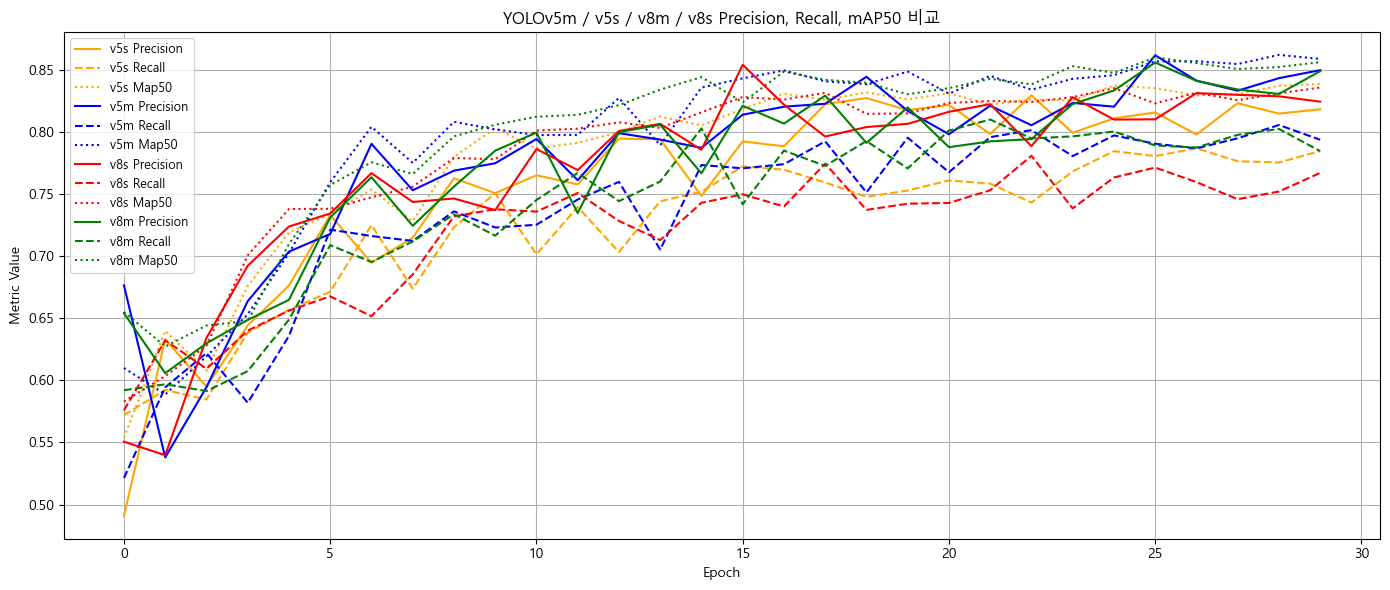

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 모델별 results.csv 경로
csv_paths = {
    "v5s": "runs_model_compare/exp_yolov5s/results.csv",
    "v5m": "runs_model_compare/exp_yolov5m/results.csv",
    "v8s": "runs_model_compare/exp_yolov8s/results.csv",
    "v8m": "runs_model_compare/exp_yolov8m/results.csv"
}

# ✅ 스타일 설정
styles = {
    "precision": "-",
    "recall": "--",
    "mAP50": ":"
}

colors = {
    "v5s": "orange",
    "v5m": "blue",
    "v8s": "red",
    "v8m": "green"
}

# ✅ 컬럼 이름 키워드
column_keywords = {
    "precision": ["precision", "metrics/precision(B)"],
    "recall": ["recall", "metrics/recall(B)"],
    "mAP50": ["mAP50", "metrics/mAP50(B)"]
}

plt.figure(figsize=(14, 6))

for model_key, path in csv_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()  # 🔧 공백 제거 중요!

    for metric_key, candidates in column_keywords.items():
        col_name = None
        for cand in candidates:
            if cand in df.columns:
                col_name = cand
                break

        if col_name:
            label = f"{model_key} {metric_key.capitalize()}"
            plt.plot(df[col_name], linestyle=styles[metric_key], color=colors[model_key], label=label)
        else:
            print(f"⚠️ {model_key} 모델에 '{metric_key}' 지표가 없습니다.")

plt.title("YOLOv5m / v5s / v8m / v8s Precision, Recall, mAP50 비교")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7452\2740535388.py:55: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_7452\2740535388.py:55: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


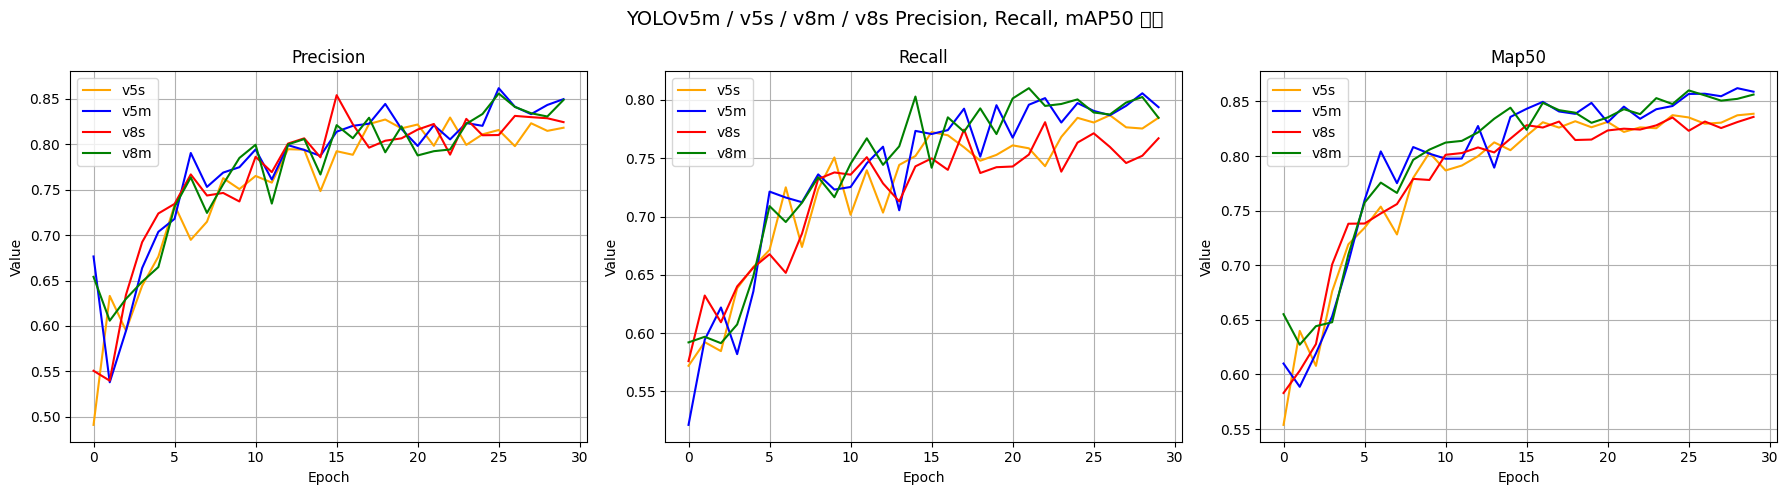

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 모델별 results.csv 경로
csv_paths = {
    "v5s": "runs_model_compare/exp_yolov5s/results.csv",
    "v5m": "runs_model_compare/exp_yolov5m/results.csv",
    "v8s": "runs_model_compare/exp_yolov8s/results.csv",
    "v8m": "runs_model_compare/exp_yolov8m/results.csv"
}

# ✅ 색상 설정
colors = {
    "v5s": "orange",
    "v5m": "blue",
    "v8s": "red",
    "v8m": "green"
}

# ✅ 컬럼 이름 키워드
column_keywords = {
    "precision": ["precision", "metrics/precision(B)"],
    "recall": ["recall", "metrics/recall(B)"],
    "mAP50": ["mAP50", "metrics/mAP50(B)"]
}

# ✅ 서브플롯 준비 (3개)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=False)
metrics = ["precision", "recall", "mAP50"]

for idx, metric_key in enumerate(metrics):
    ax = axes[idx]
    for model_key, path in csv_paths.items():
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()  # 🔧 공백 제거 중요!

        col_name = None
        for cand in column_keywords[metric_key]:
            if cand in df.columns:
                col_name = cand
                break

        if col_name:
            ax.plot(df[col_name], color=colors[model_key], label=model_key)
        else:
            print(f"⚠️ {model_key} 모델에 '{metric_key}' 지표가 없습니다.")

    ax.set_title(metric_key.capitalize())
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend()

plt.suptitle("YOLOv5m / v5s / v8m / v8s Precision, Recall, mAP50 비교", fontsize=14)
plt.tight_layout()
plt.show()


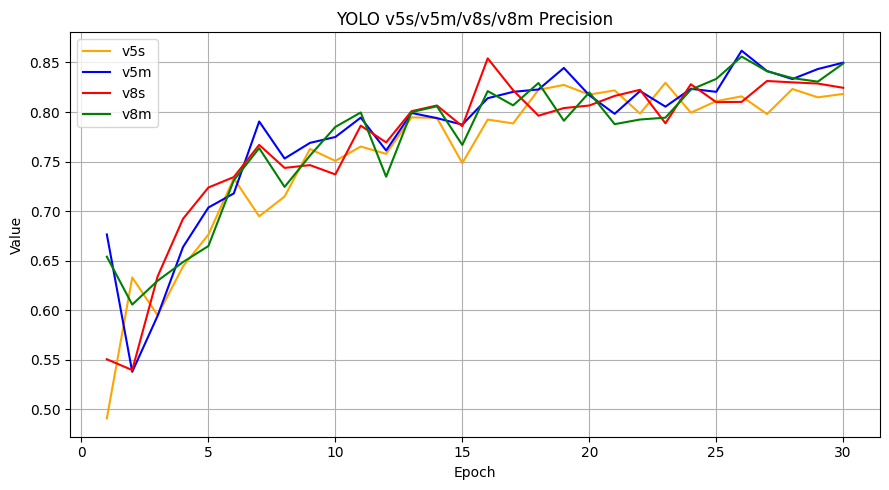

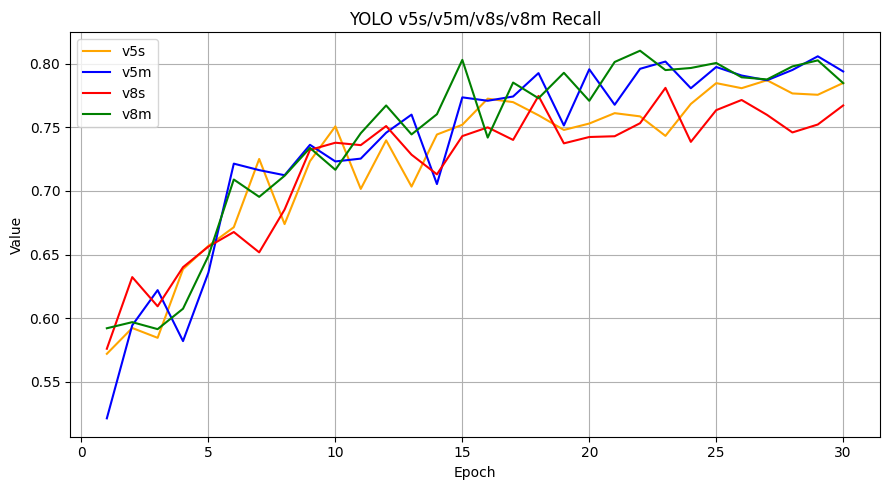

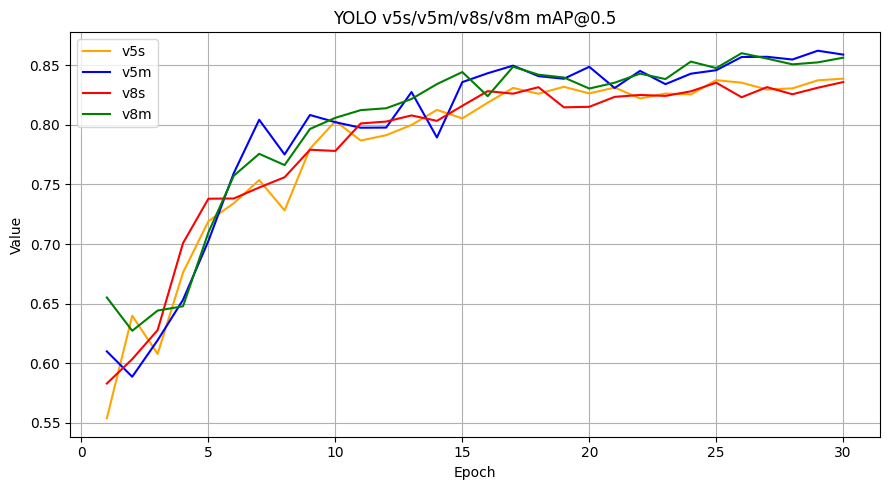

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 모델별 results.csv 경로
csv_paths = {
    "v5s": "runs_model_compare/exp_yolov5s/results.csv",
    "v5m": "runs_model_compare/exp_yolov5m/results.csv",
    "v8s": "runs_model_compare/exp_yolov8s/results.csv",
    "v8m": "runs_model_compare/exp_yolov8m/results.csv"
}

# ✅ 색상 설정
colors = {
    "v5s": "orange",
    "v5m": "blue",
    "v8s": "red",
    "v8m": "green"
}

# ✅ 컬럼 이름 키워드
column_keywords = {
    "precision": ["precision", "metrics/precision(B)"],
    "recall": ["recall", "metrics/recall(B)"],
    "mAP50": ["mAP50", "metrics/mAP50(B)"]
}

# ✅ (옵션) 이미지 저장 폴더 (저장 원치 않으면 None)
SAVE_DIR = "plots_separate"  # 예: "plots_separate" 또는 None
if SAVE_DIR:
    os.makedirs(SAVE_DIR, exist_ok=True)

metrics = ["precision", "recall", "mAP50"]

def find_epoch_x(df):
    """에폭 축 컬럼 탐색: 있으면 사용, 없으면 인덱스(0..N-1)"""
    df_cols_lower = {c.lower(): c for c in df.columns}
    for key in ["epoch", " epochs", "   epoch", "                  epoch"]:
        low = key.strip().lower()
        if low in df_cols_lower:
            return df[df_cols_lower[low]]
    # 부분 매칭(컬럼명에 epoch 포함)
    for c in df.columns:
        if "epoch" in c.lower():
            return df[c]
    return range(len(df))

for metric_key in metrics:
    # 🔹 각 지표마다 독립 figure 생성
    plt.figure(figsize=(9, 5))
    any_plotted = False

    for model_key, path in csv_paths.items():
        df = pd.read_csv(path)
        # 🔧 컬럼 헤더 공백 제거
        df.columns = df.columns.str.strip()

        # 지표 컬럼 찾기
        col_name = None
        for cand in column_keywords[metric_key]:
            if cand in df.columns:
                col_name = cand
                break

        if col_name is None:
            print(f"⚠️ {model_key} 모델에 '{metric_key}' 지표가 없습니다.")
            continue

        x = find_epoch_x(df)  # x축(에폭)
        plt.plot(x, df[col_name], label=model_key, color=colors.get(model_key, None))
        any_plotted = True

    # 플롯 꾸미기
    title_map = {"precision":"Precision", "recall":"Recall", "mAP50":"mAP@0.5"}
    plt.title(f"YOLO v5s/v5m/v8s/v8m {title_map.get(metric_key, metric_key)}")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # 저장 & 표시
    if any_plotted and SAVE_DIR:
        out_path = os.path.join(SAVE_DIR, f"{metric_key}.png")
        plt.savefig(out_path, dpi=200)
    plt.show()


In [13]:
import pandas as pd

# ✅ 모델별 results.csv 경로
csv_paths = {
    "yolov5s": "runs_model_compare/exp_yolov5s/results.csv",
    "yolov5m": "runs_model_compare/exp_yolov5m/results.csv",
    "yolov8s": "runs_model_compare/exp_yolov8s/results.csv",
    "yolov8m": "runs_model_compare/exp_yolov8m/results.csv"
}

# ✅ 결과 저장 리스트
summary_rows = []

for model_name, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()  # 공백 제거

    # ✅ 컬럼명
    col_precision = "metrics/precision(B)"
    col_recall    = "metrics/recall(B)"
    col_map50     = "metrics/mAP50(B)"
    col_map5095   = "metrics/mAP50-95(B)"

    # ✅ 가장 높은 Precision 기준 에포크 찾기
    best_idx = df[col_precision].idxmax()
    best_row = df.loc[best_idx]

    summary_rows.append({
        "Model": model_name,
        "Best Epoch": int(best_row["epoch"]) if "epoch" in df.columns else best_idx,
        "Precision": round(best_row[col_precision], 4),
        "Recall": round(best_row[col_recall], 4),
        "mAP50": round(best_row[col_map50], 4),
        "mAP50-95": round(best_row[col_map5095], 4)
    })

# ✅ 데이터프레임으로 표 출력
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by="Precision", ascending=False)  # Precision 기준 정렬

print("📊 모델별 Precision 최고 에포크 기준 성능 요약:")
display(summary_df)  # Jupyter, Colab에서는 예쁘게 표로 출력됨


📊 모델별 Precision 최고 에포크 기준 성능 요약:


,Model,Best Epoch,Precision,Recall,mAP50,mAP50-95
1,yolov5m,26,0.8619,0.7906,0.8568,0.6322
3,yolov8m,26,0.8560,0.7892,0.8601,0.6471
2,yolov8s,16,0.8541,0.7498,0.8282,0.5823
0,yolov5s,23,0.8295,0.7432,0.8262,0.5924


In [ ]:
import pandas as pd

# ✅ 모델별 results.csv 경로
csv_paths = {
    "yolov5s": "runs_model_compare/exp_yolov5s/results.csv",
    "yolov5m": "runs_model_compare/exp_yolov5m/results.csv",
    "yolov8s": "runs_model_compare/exp_yolov8s/results.csv",
    "yolov8m": "runs_model_compare/exp_yolov8m/results.csv"
}

# ✅ 결과 저장 리스트
summary_rows = []

for model_name, csv_path in csv_paths.items():
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()  # 공백 제거

    # ✅ 컬럼명 정의
    col_precision = "metrics/precision(B)"
    col_recall    = "metrics/recall(B)"
    col_map50     = "metrics/mAP50(B)"
    col_map5095   = "metrics/mAP50-95(B)"

    # ✅ 가장 높은 mAP50을 기록한 에포크 찾기
    best_idx = df[col_map50].idxmax()
    best_row = df.loc[best_idx]

    summary_rows.append({
        "Model": model_name,
        "Best Epoch": int(best_row["epoch"]) if "epoch" in df.columns else best_idx,
        "Precision": round(best_row[col_precision], 4),
        "Recall": round(best_row[col_recall], 4),
        "mAP50": round(best_row[col_map50], 4),
        "mAP50-95": round(best_row[col_map5095], 4)
    })

# ✅ 데이터프레임으로 표 출력
summary_df = pd.DataFrame(summary_rows)
print("📊 모델별 Best Epoch 기준 검증 지표 요약:")
display(summary_df)  # Jupyter/Colab에서는 display가 예쁘게 보여줌


📊 모델별 Best Epoch 기준 검증 지표 요약:


,Model,Best Epoch,Precision,Recall,mAP50,mAP50-95
0,yolov5s,30,0.8183,0.7847,0.8387,0.6024
1,yolov5m,29,0.8434,0.8057,0.8621,0.6404
2,yolov8s,30,0.8244,0.7671,0.8358,0.6130
3,yolov8m,26,0.8560,0.7892,0.8601,0.6471
